### This notebook is about applying preprocessing techniques to the e-commerce dataset

In [5]:
# loading the dataset from kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter
import kagglehub.datasets
import pandas as pd
import os
import shutil

def download_dataset(dataset_id):
    # Set dataset and download directory
    # dataset_id = "paramaggarwal/fashion-product-images-small"
    # file_path = "/"

    # Dowload the dataset
    return kagglehub.dataset_download(dataset_id)

# download the dataset
path = download_dataset(dataset_id="paramaggarwal/fashion-product-images-small")

In [2]:
print("Path to dataset files:", path)

Path to dataset files: C:\Users\gsben\.cache\kagglehub\datasets\paramaggarwal\fashion-product-images-small\versions\1


In [3]:
# taking a look at the images details
path = "1/myntradataset/"
df = pd.read_csv(path + "styles.csv", nrows=5000, on_bad_lines='warn')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt


In [4]:
# add a new column image
df['image'] = df.apply(lambda row:str(row['id']) + ".jpg", axis=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,3790,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2014,Casual,Converse Men's AS Canvas HI Black Shoe,3790.jpg
1,38460,Women,Accessories,Bags,Mobile Pouch,Green,Summer,2012,Casual,Baggit Women Green Pinto Checksy Mobile Pouch,38460.jpg
2,37285,Women,Apparel,Topwear,Tshirts,Blue,Summer,2012,Casual,Tantra Women Blue Shopping T-shirt,37285.jpg
3,51204,Women,Apparel,Innerwear,Bra,Peach,Summer,2017,Casual,Enamor Women Peach Bra,51204.jpg
4,23824,Men,Footwear,Flip Flops,Flip Flops,Black,Summer,2012,Casual,Puma Men Java Black Flip Flops,23824.jpg


In [6]:
# Copy the selected images from current dir to new dir
"""
Steps to follow:
1. Understand the dataframe (make sure there is column with image id)
2. Define paths (set source folder and destination folder paths)
3. Copy the files (copy the files using shutil)
"""

def move_data(src_path, new_path, df):
    # define source and destination paths
    source_folder = os.path.join(src_path) # original folder with all images
    new_folder = new_path

    # create the new folder if it doesnt exist
    os.makedirs(new_folder, exist_ok=True)

    # copy the 5000 images
    for idx, row in df.iterrows():
        image_filename = row['image']
        source_path = os.path.join(source_folder, image_filename)
        dest_path = os.path.join(new_folder, image_filename)

        # check if the source file exists before copying
        if os.path.exists(source_path):
            shutil.copy2(source_path, dest_path) # copy2 helps preserve metadata
            print(f"Copied: {image_filename}")
        else:
            print(f"Warning: {image_filename} not found in {source_folder}")

    # Verify the number of files copied
    copied_files = len(os.listdir(new_folder))
    print(f"Total files copied: {copied_files}")

src_path = "C:/Research Folder/Ecommerce_Product_classification/1/myntradataset/images/"
new_path = "C:/Research Folder/Ecommerce_Product_classification/images/"

move_data(src_path, new_path, df)

Copied: 3790.jpg
Copied: 38460.jpg
Copied: 37285.jpg
Copied: 51204.jpg
Copied: 23824.jpg
Copied: 22139.jpg
Copied: 16360.jpg
Copied: 42042.jpg
Copied: 26902.jpg
Copied: 12766.jpg
Copied: 56486.jpg
Copied: 34233.jpg
Copied: 22191.jpg
Copied: 39986.jpg
Copied: 28606.jpg
Copied: 53101.jpg
Copied: 27475.jpg
Copied: 56882.jpg
Copied: 51656.jpg
Copied: 11382.jpg
Copied: 39345.jpg
Copied: 7965.jpg
Copied: 12734.jpg
Copied: 35384.jpg
Copied: 28831.jpg
Copied: 21119.jpg
Copied: 45295.jpg
Copied: 7532.jpg
Copied: 47334.jpg
Copied: 57530.jpg
Copied: 20259.jpg
Copied: 24052.jpg
Copied: 2049.jpg
Copied: 25949.jpg
Copied: 38296.jpg
Copied: 49433.jpg
Copied: 31970.jpg
Copied: 2674.jpg
Copied: 15510.jpg
Copied: 56813.jpg
Copied: 29926.jpg
Copied: 4916.jpg
Copied: 58719.jpg
Copied: 19974.jpg
Copied: 4149.jpg
Copied: 40517.jpg
Copied: 28608.jpg
Copied: 23276.jpg
Copied: 44385.jpg
Copied: 36303.jpg
Copied: 55052.jpg
Copied: 3309.jpg
Copied: 57959.jpg
Copied: 53555.jpg
Copied: 8915.jpg
Copied: 24499.jpg
C

In [7]:
# Lets inspec the data
df['subCategory'].unique()

array(['Shoes', 'Bags', 'Topwear', 'Innerwear', 'Flip Flops', 'Nails',
       'Jewellery', 'Watches', 'Scarves', 'Wallets', 'Fragrance', 'Lips',
       'Saree', 'Shoe Accessories', 'Headwear', 'Sandal', 'Socks',
       'Makeup', 'Eyewear', 'Bottomwear', 'Eyes', 'Belts', 'Dress',
       'Skin Care', 'Mufflers', 'Ties', 'Accessories',
       'Loungewear and Nightwear', 'Free Gifts', 'Skin',
       'Beauty Accessories', 'Water Bottle', 'Apparel Set',
       'Bath and Body', 'Gloves', 'Sports Accessories'], dtype=object)

### Building CustomDatasets and Dataloaders
Define a Custom Dataset Class  
Create a class to handle your specific data structure (e.g., dataframe with image paths and labels).  

Set up initialization to take your data source, file directory, and any transformations.  

Split the data into training and validation sets (e.g., using a percentage like 20% for validation).  

Map your labels (categories) to numbers for model training.  

Define how to load and return a single image-label pair (e.g., open image, apply transforms, get label).

Set Up Transformations  
Decide how to preprocess and augment your images (e.g., resize, flip, rotate).  

Combine these operations into a single pipeline that converts images into the format your model expects (like tensors).

Create Dataset Instances  
Make one dataset for training using your custom class, passing the data, directory, transformations, and specifying it’s for training.  

Make another dataset for validation, using the same setup but marking it as validation.

Wrap Datasets in Data Loaders  
Create a loader for the training dataset to handle batching, shuffling, and parallel loading.  

Create a loader for the validation dataset, typically without shuffling, for consistent evaluation.  

Set parameters like batch size and number of workers based on your system.

Use in Training Loop  
Iterate over the data loaders in your training loop to get batches of images and labels.  

Move data to your device (e.g., GPU) and proceed with model training.

In [10]:
# load images, apply transformation and split into training and testing dataloaders
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision
from PIL import Image
import pandas as pd
import os

# step 1: Filter the dataframe to only 5 subcategory
choosen_subcategories = ["Topwear", "Shoes", "Bottomwear", "Headwear", "Sports Accessories"]
df_filtered = df.loc[lambda df: df['subCategory'].isin(choosen_subcategories)]

# step 2: Define the Custom Dataset class
class CustomImageDataset(Dataset):
    def __init__(self,
                 dataframe,
                 directory,
                 transform=None,
                 subset="training"
                 ):
        self.df = dataframe
        self.dir = directory
        self.transform = transform

        #Create label-to-index mapping inside the dataset class
        self.class_to_idx = {class_name: idx for idx, class_name in enumerate(sorted(self.df["subCategory"].unique()))}
        self.idx_to_class = {idx: class_name for class_name, idx in self.class_to_idx.items()}  # Reverse mapping
        
        print("Class Mapping:", self.class_to_idx)  # Debugging to check the mapping
        
        # Split data into training and validation
        self.validation_split = 0.2
        self.total_size = len(self.df)
        self.val_size = int(self.validation_split * self.total_size)

        if subset == "training":
            self.df = self.df.iloc[self.val_size:]
        else: # validation
            self.df = self.df.iloc[:self.val_size]


    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.dir, self.df.iloc[idx]['image'])
        image = Image.open(img_name).convert('RGB')
        label = self.df.iloc[idx]['subCategory']
        label = self.class_to_idx[label] # converts to integer

        if self.transform:
            image = self.transform(image)

        return image, label
    
new_path = "images/"
# step 3: Define transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match EfficientNet input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize as required
])

# Step 4: Create datasets with the filtered dataframe
train_dataset = CustomImageDataset(
    dataframe=df_filtered,
    directory=os.path.join(new_path),
    transform=data_transforms,
    subset="training"
)

val_dataset = CustomImageDataset(
    dataframe=df_filtered,
    directory=os.path.join(new_path),
    transform=data_transforms,
    subset="validation"
)

Class Mapping: {'Bottomwear': 0, 'Headwear': 1, 'Shoes': 2, 'Sports Accessories': 3, 'Topwear': 4}
Class Mapping: {'Bottomwear': 0, 'Headwear': 1, 'Shoes': 2, 'Sports Accessories': 3, 'Topwear': 4}


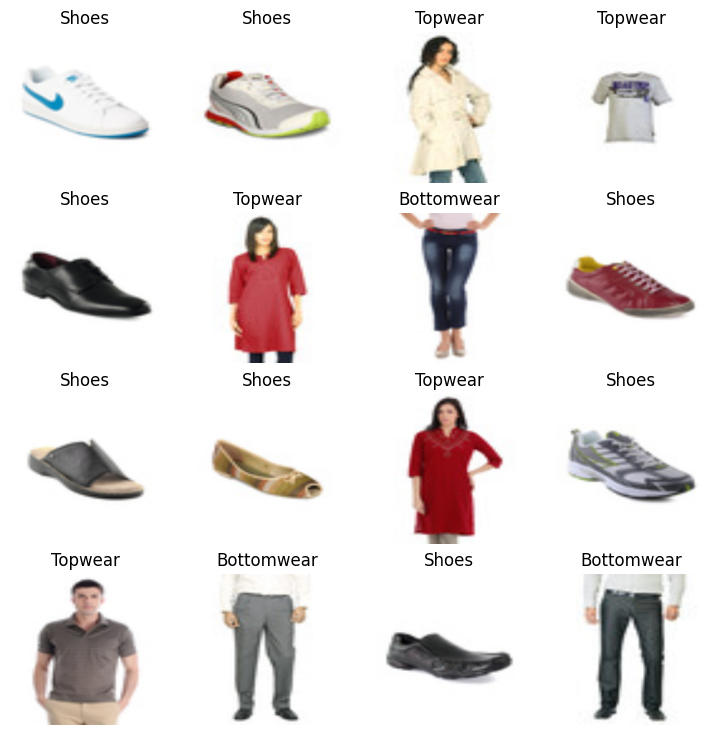

In [11]:
# Taking a look at the training data
import matplotlib.pyplot as plt
import torch

# Ensure reproducibility
torch.manual_seed(42)

# Define ImageNet mean & std (for denormalization)
imagenet_mean = torch.tensor([0.485, 0.456, 0.406])
imagenet_std = torch.tensor([0.229, 0.224, 0.225])

# Function to denormalize an image
def denormalize(img):
    img = img.clone().detach()  # Avoid modifying original tensor
    img = img * imagenet_std[:, None, None] + imagenet_mean[:, None, None]  # Reverse normalization
    img = torch.clamp(img, 0, 1)  # Clip values to [0,1] for proper visualization
    return img

# Define figure
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4  # Create a grid of 4x4 images

for i in range(1, rows * cols + 1):
    # Random index selection
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_idx]

    # Denormalize the image if it was normalized
    img = denormalize(img)

    # Convert image to (H, W, C) format for RGB display
    img = img.permute(1, 2, 0)  # Convert from (C, H, W) → (H, W, C)

    # Convert label index to class name
    class_name = train_dataset.idx_to_class[label]  # Get the class name

    # Add subplot
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img)  # No need for cmap, since it's properly scaled now
    ax.set_title(class_name)  # Show actual class name
    ax.axis("off")  # Hide axes

plt.show()

In [21]:
# Creating the dataloaders
batch_size = 32
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,

)

In [9]:
# taking a look at a single sample
x, y = next(iter(train_loader))
print(f"x shape: {x.shape} | y shape: {y.shape}")

x shape: torch.Size([32, 3, 224, 224]) | y shape: torch.Size([32])


### Use of pretrained models for training (EfficientNeb0)

In [10]:
import torch
print(torch.__version__)  # Check PyTorch version
print(torch.cuda.is_available())  # Should return True if GPU is detected

2.6.0+cu118
True


In [11]:
# loading the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device: {device}")

weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # best available weights
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

device: cuda


In [15]:
# view the summary of the model
from torchinfo import summary
summary(model=model, input_size=(batch_size, 3, 224, 224))

Layer (type:depth-idx)                                  Output Shape              Param #
EfficientNet                                            [32, 1000]                --
├─Sequential: 1-1                                       [32, 1280, 7, 7]          --
│    └─Conv2dNormActivation: 2-1                        [32, 32, 112, 112]        --
│    │    └─Conv2d: 3-1                                 [32, 32, 112, 112]        864
│    │    └─BatchNorm2d: 3-2                            [32, 32, 112, 112]        64
│    │    └─SiLU: 3-3                                   [32, 32, 112, 112]        --
│    └─Sequential: 2-2                                  [32, 16, 112, 112]        --
│    │    └─MBConv: 3-4                                 [32, 16, 112, 112]        1,448
│    └─Sequential: 2-3                                  [32, 24, 56, 56]          --
│    │    └─MBConv: 3-5                                 [32, 24, 56, 56]          6,004
│    │    └─MBConv: 3-6                              

In [24]:
# freezing the base model and changing the output layer to suit our needs
# freeze all base layers in the "features" section of the model
for param in model.features.parameters():
    param.requires_grad = False

# changing the output size
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280, 
                    out_features=5, 
                    bias=True).to(device) # same number of outputs as our number of classes
)

In [25]:
# check the summary
summary(model=model, input_size=(batch_size, 3, 224, 224))

Layer (type:depth-idx)                                  Output Shape              Param #
EfficientNet                                            [32, 5]                   --
├─Sequential: 1-1                                       [32, 1280, 7, 7]          --
│    └─Conv2dNormActivation: 2-1                        [32, 32, 112, 112]        --
│    │    └─Conv2d: 3-1                                 [32, 32, 112, 112]        (864)
│    │    └─BatchNorm2d: 3-2                            [32, 32, 112, 112]        (64)
│    │    └─SiLU: 3-3                                   [32, 32, 112, 112]        --
│    └─Sequential: 2-2                                  [32, 16, 112, 112]        --
│    │    └─MBConv: 3-4                                 [32, 16, 112, 112]        (1,448)
│    └─Sequential: 2-3                                  [32, 24, 56, 56]          --
│    │    └─MBConv: 3-5                                 [32, 24, 56, 56]          (6,004)
│    │    └─MBConv: 3-6                      

### Training the model

In [26]:
import torch
from tqdm import tqdm
import numpy as np

def train_step(model, dataloader, loss_fn, optimizer, device):
    model.train()  # Set model to training mode
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        out = model(X.float())  # Raw logits
        loss = loss_fn(out, y)  # CrossEntropyLoss expects raw logits
        train_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        preds = torch.argmax(out, dim=1)  # Get predicted class
        train_acc += (preds == y).sum().item() / len(y)

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

def test_step(model, dataloader, loss_fn, device):
    model.eval()  # Set model to evaluation mode
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            
            # Forward pass
            out = model(X.float())
            loss = loss_fn(out, y)
            test_loss += loss.item()

            # Calculate accuracy
            preds = torch.argmax(out, dim=1)
            test_acc += (preds == y).sum().item() / len(y)
    
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc

def train_model(model, train_loader, test_loader, loss_fn, optimizer, device, epochs):
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": [], "overfit_factor": []}

    for epoch in tqdm(range(epochs), desc="Training Progress"):
        train_loss, train_acc = train_step(model, train_loader, loss_fn, optimizer, device)
        test_loss, test_acc = test_step(model, test_loader, loss_fn, device)

    
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc:.3f} | Test Loss: {test_loss:.3f} | Test Acc: {test_acc:.3f}")

        # Store metrics
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    
    # Compute average test accuracy
    avg_acc = np.mean(results["test_acc"]) * 100
    print(f"Test Average Accuracy: {avg_acc:.2f}%")

    return results

In [30]:
# define loss and optimizer
import torch.nn as nn
from timeit import default_timer as timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# start the timer
star_time = timer()

results = train_model(
    model = model,
    train_loader=train_loader,
    test_loader=val_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    device=device,
    epochs=5
)

# End timer
end_time = timer()
print(f"[INFO] Total training time: {end_time - star_time:.3f} seconds")

Training Progress:   0%|          | 0/5 [00:00<?, ?it/s]

Training Progress:  20%|██        | 1/5 [00:38<02:32, 38.02s/it]

Epoch 1/5 | Train Loss: 0.476 | Train Acc: 0.861 | Test Loss: 0.200 | Test Acc: 0.957


Training Progress:  40%|████      | 2/5 [00:52<01:13, 24.41s/it]

Epoch 2/5 | Train Loss: 0.185 | Train Acc: 0.952 | Test Loss: 0.133 | Test Acc: 0.974


Training Progress:  60%|██████    | 3/5 [01:07<00:40, 20.10s/it]

Epoch 3/5 | Train Loss: 0.123 | Train Acc: 0.969 | Test Loss: 0.110 | Test Acc: 0.983


Training Progress:  80%|████████  | 4/5 [01:22<00:18, 18.00s/it]

Epoch 4/5 | Train Loss: 0.100 | Train Acc: 0.977 | Test Loss: 0.092 | Test Acc: 0.983


Training Progress: 100%|██████████| 5/5 [01:37<00:00, 19.51s/it]

Epoch 5/5 | Train Loss: 0.085 | Train Acc: 0.982 | Test Loss: 0.082 | Test Acc: 0.983
Test Average Accuracy: 97.57%
[INFO] Total training time: 97.587 seconds


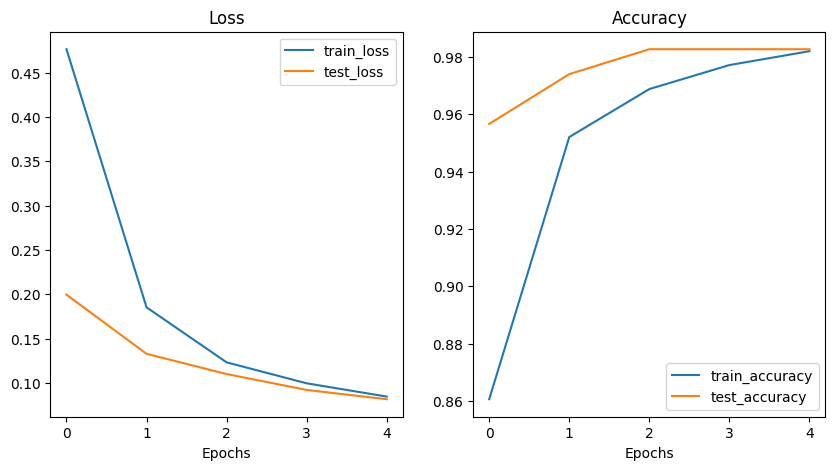

In [34]:
# plot the loss curves
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(10, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

plot_loss_curves(results)